In [2]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv')
train_df.head()

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
import plotly.express as px

location_cols = [col for col in train_df.columns if col not in ['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality', 'Aneurysm Present']]
location_counts = train_df[location_cols].sum().sort_values(ascending=False)

fig = px.bar(
    location_counts,
    orientation='v',
    title='📊 Aneurysm Count by Location',
    labels={'value': 'Count', 'index': 'Location'},
    color=location_counts.values,
    color_continuous_scale=[[0, '#00BFC4'], [1, '#C77CFF']],
    template='plotly_dark'
)
fig.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

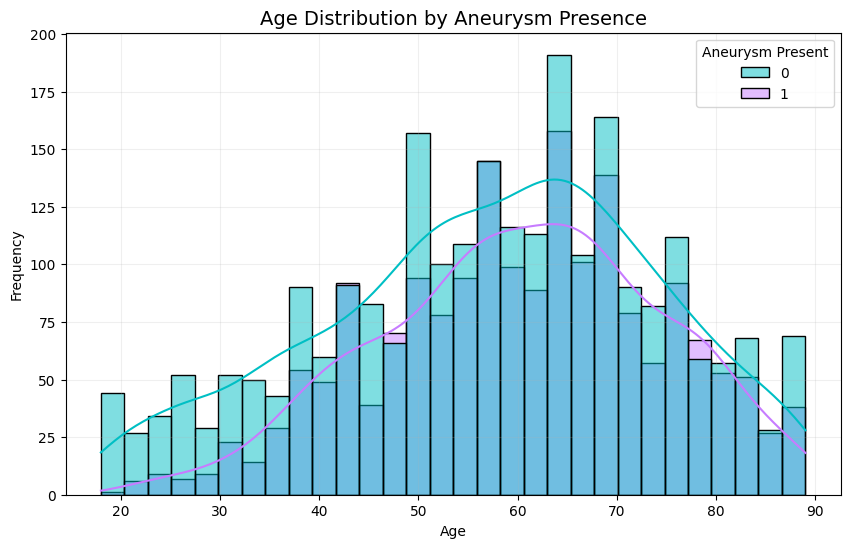

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.histplot(
    data=train_df,
    x='PatientAge',
    hue='Aneurysm Present',
    bins=30,
    kde=True,
    palette={0: '#00BFC4', 1: '#C77CFF'}
)
plt.title("Age Distribution by Aneurysm Presence", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

In [5]:
fig = px.histogram(
    train_df,
    x='Aneurysm Present',
    title='⚖️ Class Imbalance: Any Aneurysm Present',
    color='Aneurysm Present',
    text_auto=True,
    color_discrete_map={0: '#00BFC4', 1: '#C77CFF'},
    template='plotly_dark'
)
fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=["No Aneurysm", "Aneurysm"])
fig.show()

In [6]:
# Simple % table (can be styled in notebook output)
gender_ct = pd.crosstab(train_df['PatientSex'], train_df['Aneurysm Present'], normalize='index') * 100
gender_ct = gender_ct.rename(columns={0: 'No Aneurysm (%)', 1: 'Aneurysm (%)'})
gender_ct.style.background_gradient(cmap='crest').format("{:.1f}%")

Aneurysm Present,No Aneurysm (%),Aneurysm (%)
PatientSex,,
Female,53.2%,46.8%
Male,66.0%,34.0%


In [7]:
import pandas as pd
import ast

localizers_df = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv')

# Convert coordinate strings to dicts
localizers_df['coords'] = localizers_df['coordinates'].apply(ast.literal_eval)
localizers_df['x'] = localizers_df['coords'].apply(lambda d: d['x'])
localizers_df['y'] = localizers_df['coords'].apply(lambda d: d['y'])

localizers_df.drop(columns=['coordinates', 'coords'], inplace=True)
localizers_df.head()

,SeriesInstanceUID,SOPInstanceUID,location,x,y
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,Other Posterior Circulation,258.362119,261.359900
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,Right Middle Cerebral Artery,194.872531,178.326750
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,Right Middle Cerebral Artery,189.239799,209.191849
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,Right Infraclinoid Internal Carotid Artery,208.280505,229.789621
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,Anterior Communicating Artery,249.867456,220.623045


In [8]:
fig = px.density_heatmap(
    localizers_df,
    x='x',
    y='y',
    nbinsx=50,
    nbinsy=50,
    title='🧠 Heatmap of Aneurysm Locations in 2D Image Space',
    color_continuous_scale='Turbo',
    template='plotly_dark',
)
fig.update_yaxes(autorange="reversed")
fig.show()

In [9]:
fig = px.scatter(
    localizers_df,
    x='x',
    y='y',
    color='location',
    title='🧠 2D Scatter of Aneurysm Coordinates by Location',
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Dark24
)
fig.update_yaxes(autorange="reversed")
fig.show()


/tmp/ipykernel_48/3895330814.py:17: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.



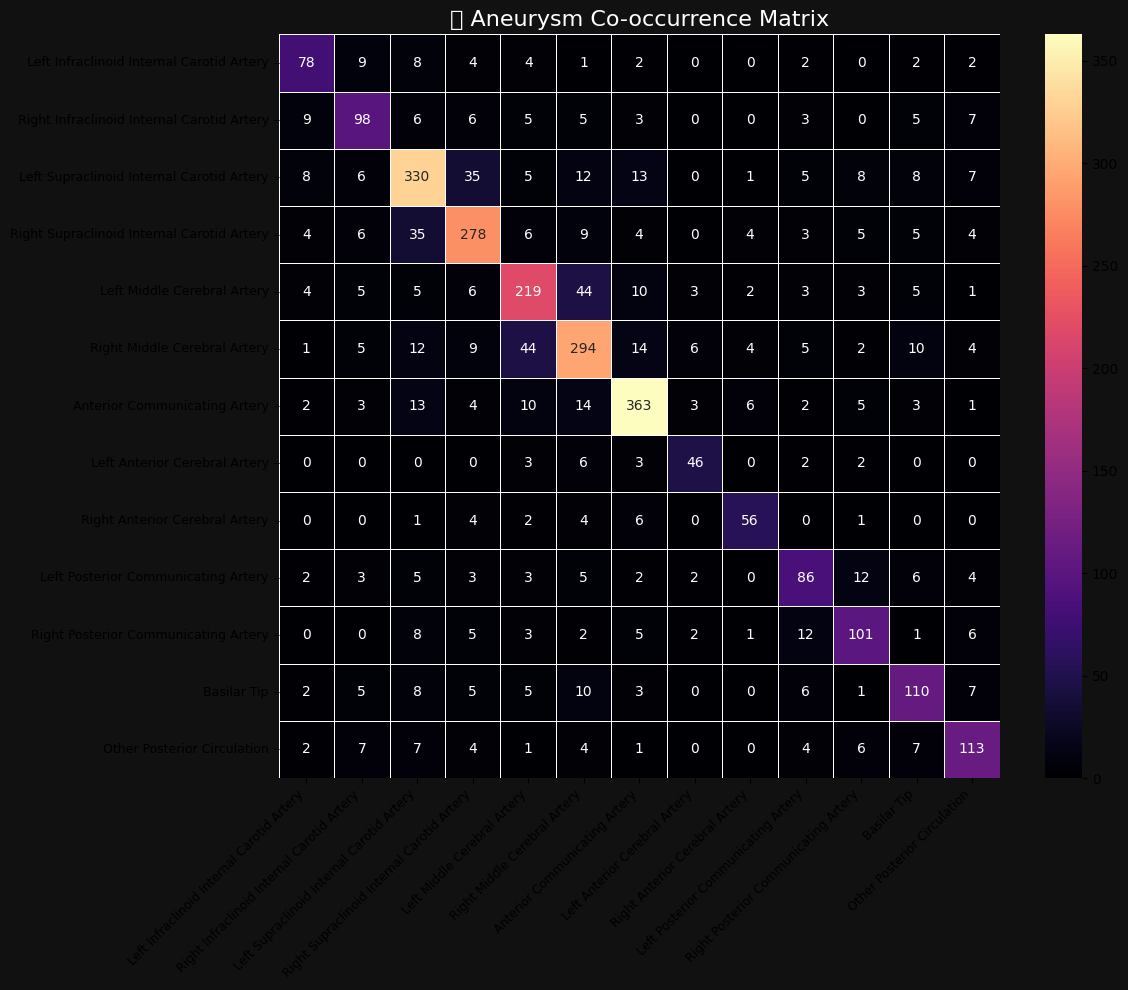

In [10]:
df = train_df
# Identify location columns correctly
location_cols = df.columns[4:-1]  # skip UID, Age, Sex, Modality, and skip final label
location_df = df[location_cols].astype(int)  # just in case they're still object type

# Co-occurrence matrix
co_matrix = location_df.T.dot(location_df)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, cmap="magma", annot=True, fmt=".0f", linewidths=0.5)
plt.title("🧠 Aneurysm Co-occurrence Matrix", fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('#111111')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



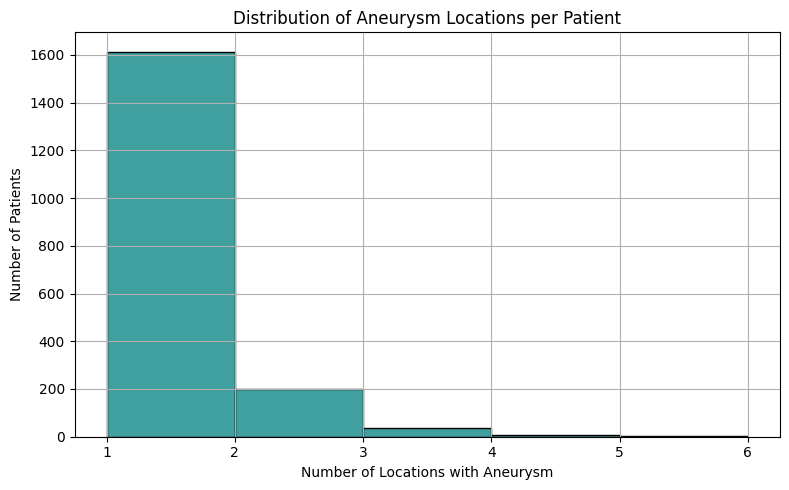

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Location Count Distribution (number of 1s per row)
location_counts = location_df.sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(location_counts, bins=range(1, location_counts.max()+2), kde=False, color="teal")
plt.title("Distribution of Aneurysm Locations per Patient")
plt.xlabel("Number of Locations with Aneurysm")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_48/668340398.py:27: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.



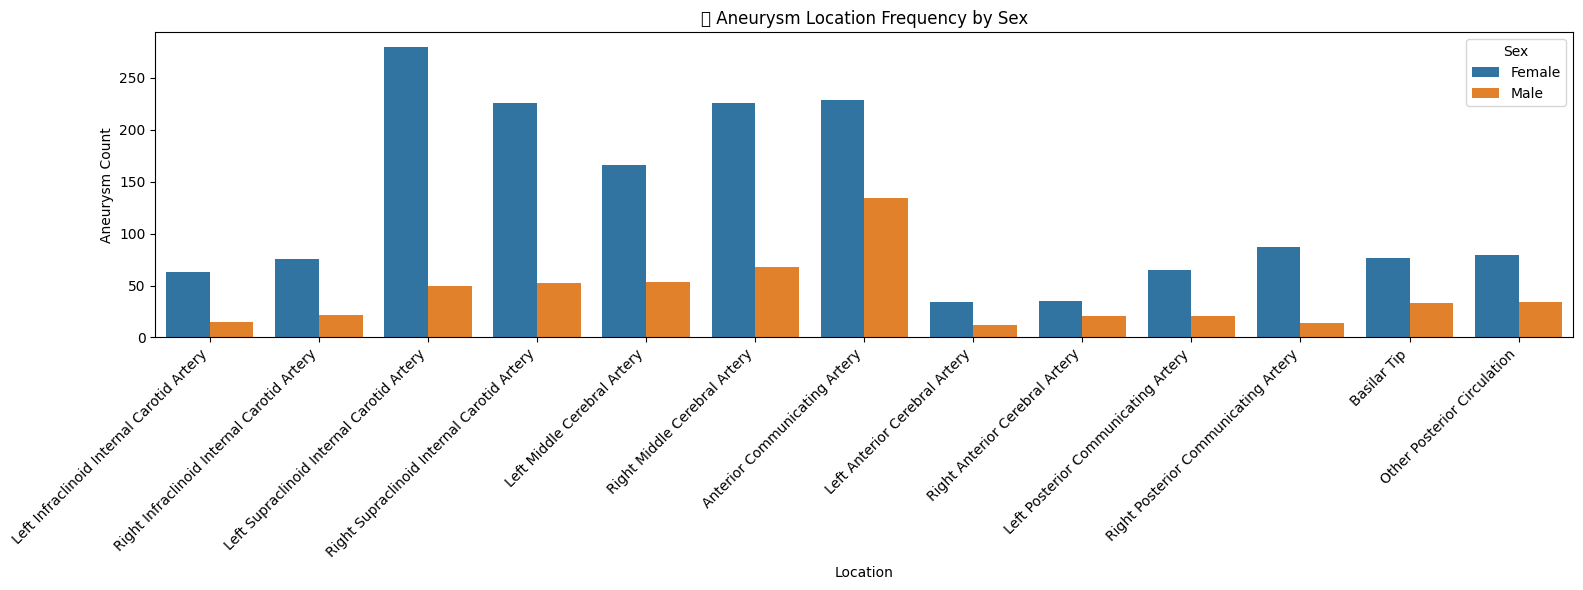

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and preprocessed (i.e., binary columns are int)

# Filter only rows where aneurysm is present
df_pos = df[df["Aneurysm Present"] == 1]

# List of all aneurysm location columns
location_cols = df_pos.columns[4:-1]  # From 'Left Infraclinoid...' to 'Other Posterior Circulation'

# Group by PatientSex and sum each location
sex_location = df_pos.groupby("PatientSex")[location_cols].sum().T

# Reset index for plotting
sex_location = sex_location.reset_index().melt(id_vars="index", var_name="Sex", value_name="Count")
sex_location = sex_location.rename(columns={"index": "Location"})

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=sex_location, x="Location", y="Count", hue="Sex")
plt.xticks(rotation=45, ha="right")
plt.title("🧬 Aneurysm Location Frequency by Sex")
plt.ylabel("Aneurysm Count")
plt.xlabel("Location")
plt.tight_layout()
plt.show()


/tmp/ipykernel_48/420790135.py:22: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.



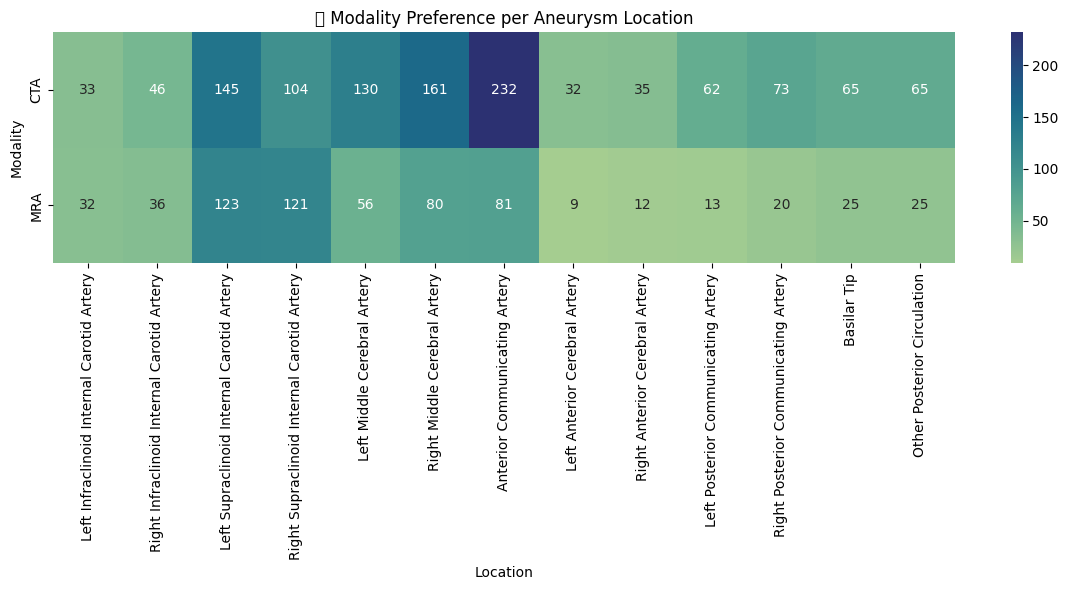

In [13]:
# Filter rows with aneurysm present
df_pos = df[df["Aneurysm Present"] == 1].copy()

# Initialize a dictionary to store counts
modality_counts = {}

for loc in location_cols:
    subset = df_pos[df_pos[loc] == 1]
    modality_distribution = subset["Modality"].value_counts()
    modality_counts[loc] = modality_distribution

# Convert to DataFrame and fill missing values with 0
modality_df = pd.DataFrame(modality_counts).T.fillna(0).astype(int)
modality_df = modality_df[["CTA", "MRA"]] if "CTA" in modality_df.columns and "MRA" in modality_df.columns else modality_df

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(modality_df.T, annot=True, cmap="crest", fmt="d")
plt.title("🧠 Modality Preference per Aneurysm Location")
plt.xlabel("Location")
plt.ylabel("Modality")
plt.tight_layout()
plt.show()

/tmp/ipykernel_48/1673348037.py:10: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.



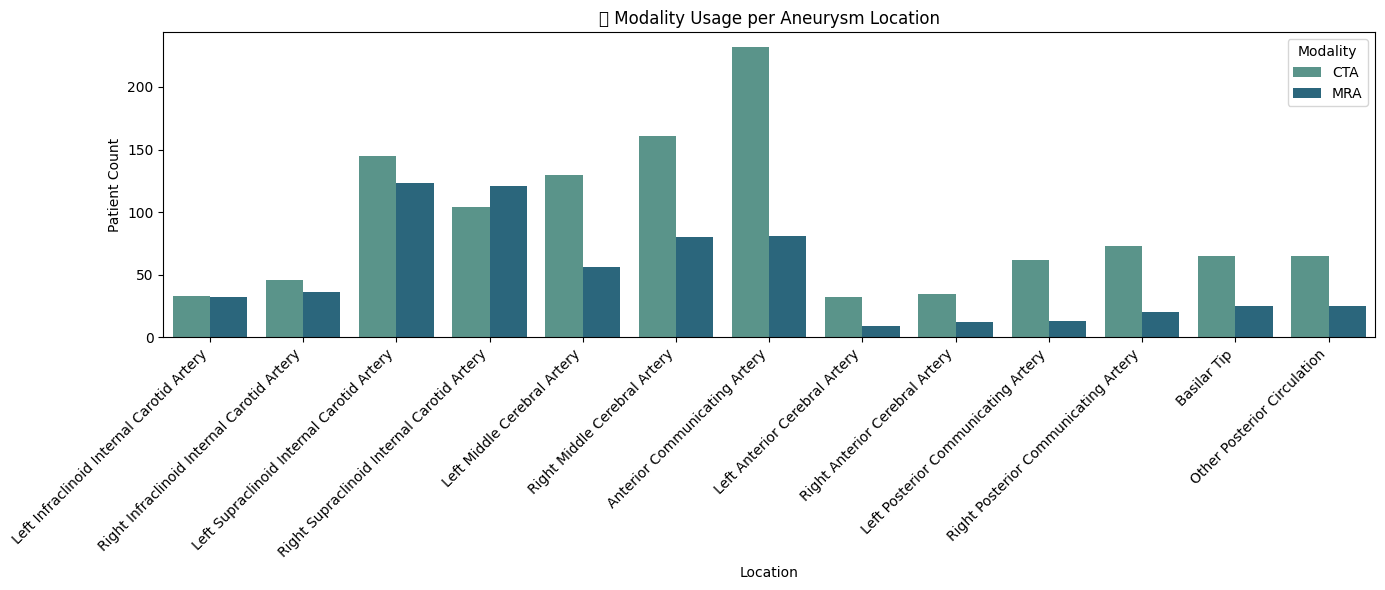

In [14]:
modality_df_melted = modality_df.reset_index().melt(id_vars="index", value_name="Count", var_name="Modality")
modality_df_melted.rename(columns={"index": "Location"}, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(data=modality_df_melted, x="Location", y="Count", hue="Modality", palette="crest")
plt.title("🧠 Modality Usage per Aneurysm Location")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location")
plt.ylabel("Patient Count")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_48/2594185637.py:20: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.



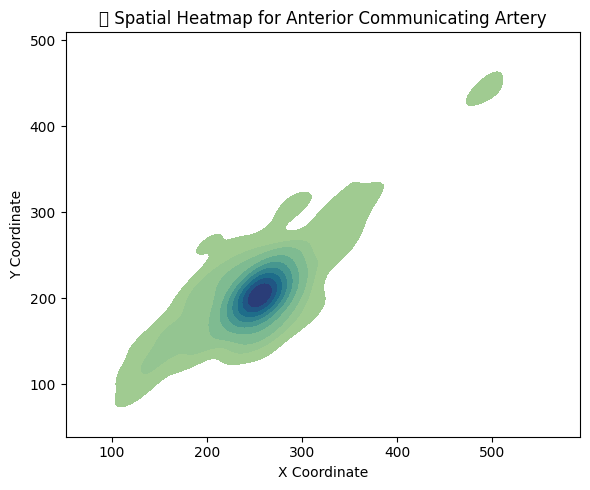

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_48/2594185637.py:20: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.



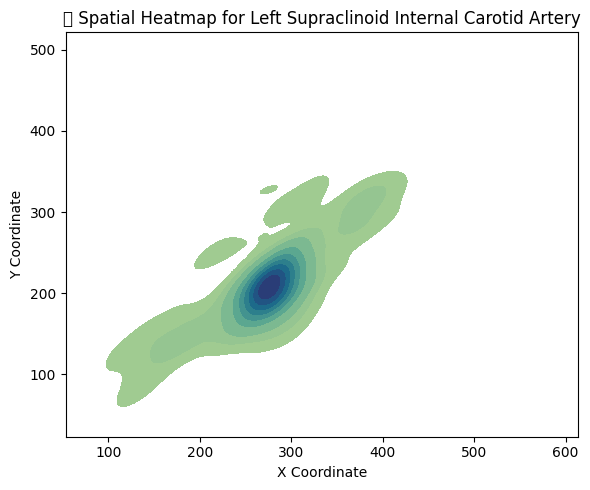

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_48/2594185637.py:20: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.



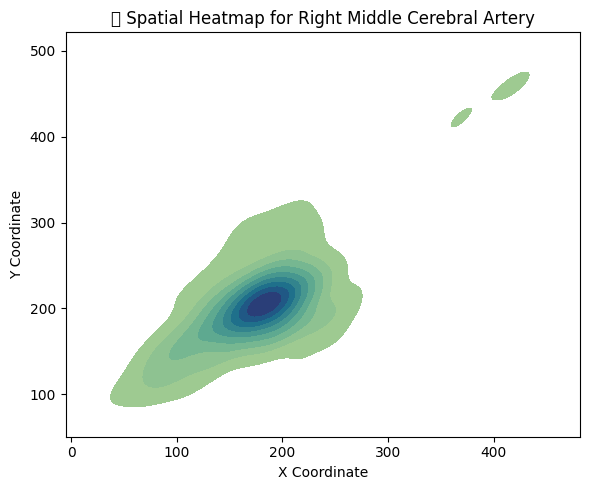

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_48/2594185637.py:20: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.



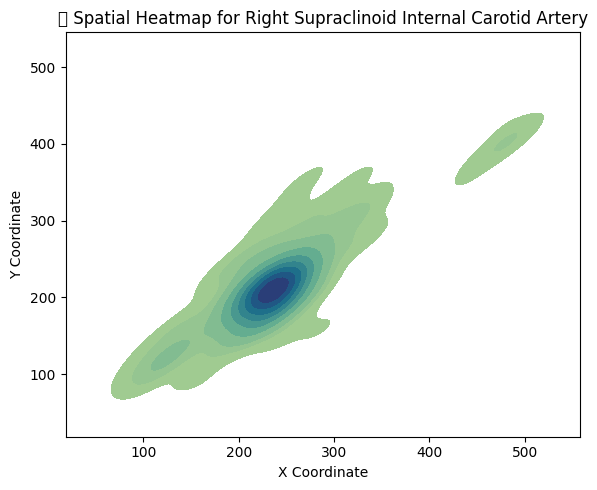

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_48/2594185637.py:20: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from current font.



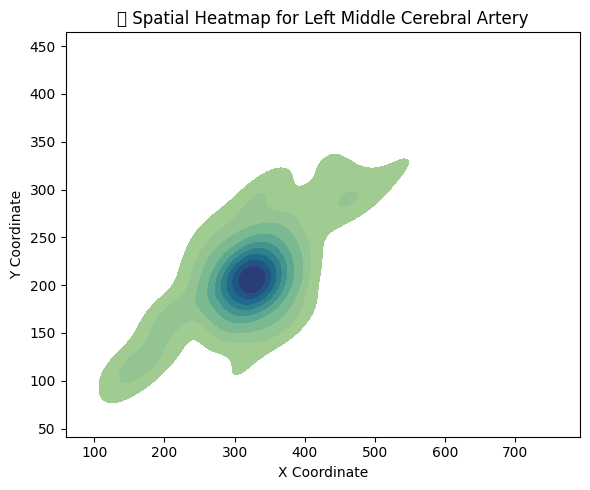

In [15]:
import ast

train_localizations = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv")
# Parse coordinates
train_localizations["coord_dict"] = train_localizations["coordinates"].apply(ast.literal_eval)
train_localizations["x"] = train_localizations["coord_dict"].apply(lambda d: d["x"])
train_localizations["y"] = train_localizations["coord_dict"].apply(lambda d: d["y"])

# Top 4-5 most frequent locations
top_locations = train_localizations["location"].value_counts().head(5).index

# Plot heatmap per location
for loc in top_locations:
    subset = train_localizations[train_localizations["location"] == loc]
    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=subset, x="x", y="y", fill=True, cmap="crest")
    plt.title(f"🧭 Spatial Heatmap for {loc}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_48/1663271545.py:16: UserWarning:

Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.



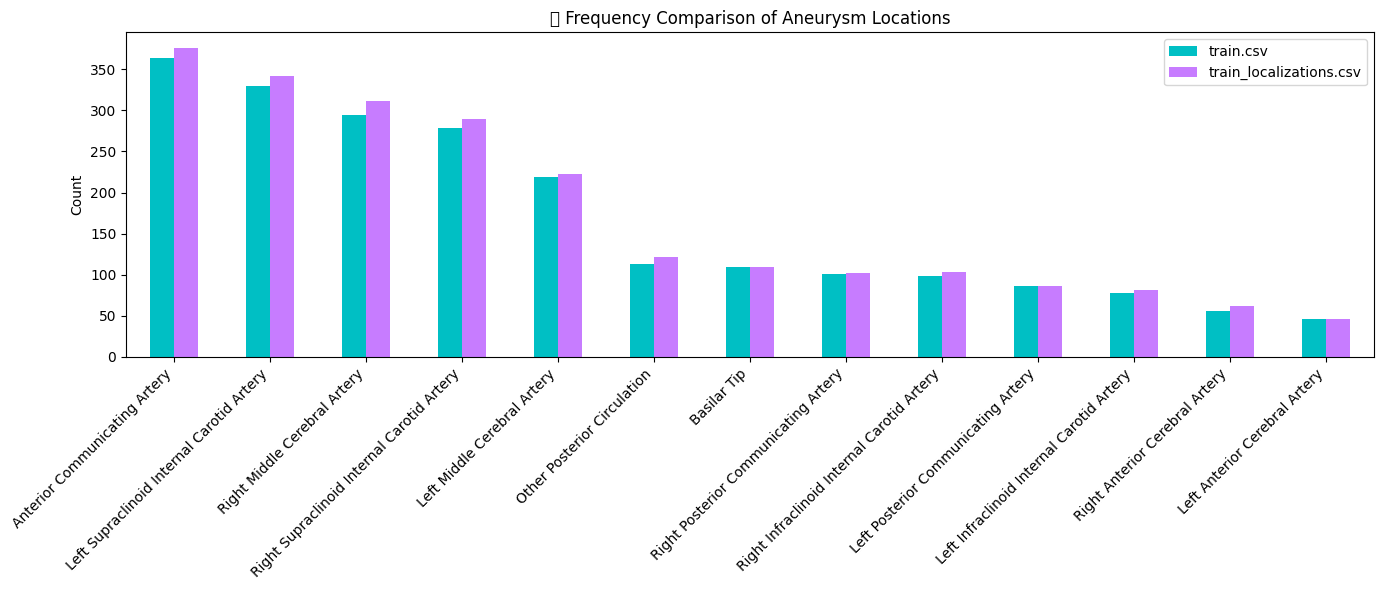

In [16]:
train = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")
# Frequency from train.csv
label_freq = train[location_cols].sum().sort_values(ascending=False).rename("train.csv")

# Frequency from localizations.csv
localizer_freq = train_localizations["location"].value_counts().rename("train_localizations.csv")

# Combine
freq_comparison = pd.concat([label_freq, localizer_freq], axis=1).fillna(0).astype(int)

# Bar plot
freq_comparison.plot(kind="bar", figsize=(14, 6), color=['#00BFC4',  '#C77CFF'])
plt.title("🔄 Frequency Comparison of Aneurysm Locations")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
import os
import pandas as pd

series_dir = '/kaggle/input/rsna-intracranial-aneurysm-detection/series'
series_folders = [f for f in os.listdir(series_dir) if os.path.isdir(os.path.join(series_dir, f))]

series_counts = []
for folder in series_folders:
    dcm_files = os.listdir(os.path.join(series_dir, folder))
    series_counts.append({'SeriesInstanceUID': folder, 'NumSlices': len(dcm_files)})

df_series = pd.DataFrame(series_counts)
df_series.describe()

KeyboardInterrupt: 

In [19]:
import pydicom

sample_path = os.path.join(series_dir, series_folders[0])
sample_file = os.listdir(sample_path)[0]
dcm = pydicom.dcmread(os.path.join(sample_path, sample_file))

print(f"Orientation: {dcm.ImageOrientationPatient}")
print(f"Voxel spacing: {dcm.PixelSpacing}")
print(f"Slice Thickness: {dcm.SliceThickness}")

Orientation: [0.9982057410308, 0.05044316314301, -0.0322612130161, -0.0488204026667, 0.9975925261746, 0.04925159899981]
Voxel spacing: [0.4910714328289, 0.4910714328289]
Slice Thickness: 1.5


In [20]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np

def load_series(series_path):
    files = sorted(os.listdir(series_path), key=lambda x: pydicom.dcmread(os.path.join(series_path, x)).InstanceNumber)
    images = [pydicom.dcmread(os.path.join(series_path, f)).pixel_array for f in files]
    return np.stack(images)

volume = load_series(os.path.join(series_dir, series_folders[0]))

# Scrollable plot
from ipywidgets import interact
@interact(slice=(0, volume.shape[0]-1))
def show_slice(slice=0):
    plt.imshow(volume[slice], cmap='gray')
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=119), Output()), _dom_classes=('widget-inter…

<Axes: title={'center': '🖼 Common Image Resolutions'}, ylabel='Shape'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.



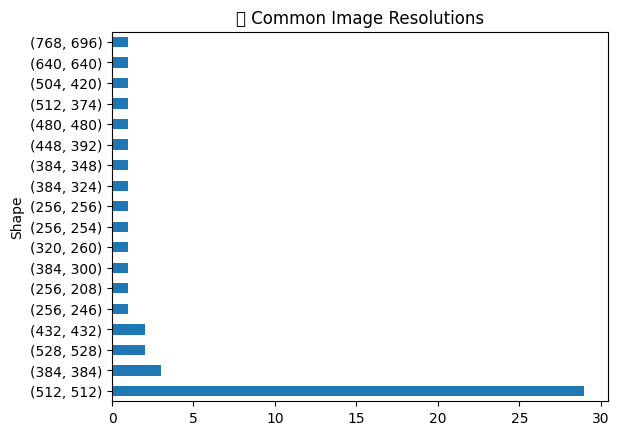

In [21]:
import os
import pydicom

# Count slices and shape per series
dicom_dir = '/kaggle/input/rsna-intracranial-aneurysm-detection/series'
series_stats = []

for series_id in os.listdir(dicom_dir)[:50]:  # limit for speed
    series_path = os.path.join(dicom_dir, series_id)
    files = os.listdir(series_path)
    num_slices = len(files)
    sample_dcm = pydicom.dcmread(os.path.join(series_path, files[0]))
    shape = (sample_dcm.Rows, sample_dcm.Columns)
    series_stats.append({"SeriesInstanceUID": series_id, "Slices": num_slices, "Shape": shape})

pd.DataFrame(series_stats).value_counts("Shape").plot(kind="barh", title="🖼 Common Image Resolutions")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, '📐 Slice Thickness Distribution')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.



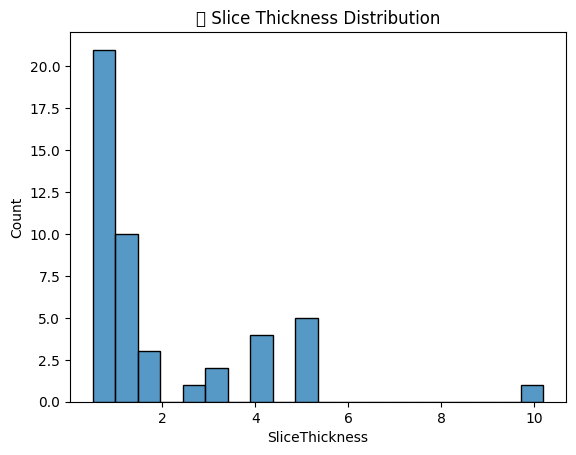

In [22]:
voxel_data = []

for series_id in os.listdir(dicom_dir)[:50]:
    slices = []
    for f in sorted(os.listdir(os.path.join(dicom_dir, series_id))):
        path = os.path.join(dicom_dir, series_id, f)
        dcm = pydicom.dcmread(path)
        slices.append(dcm)

    try:
        spacing = slices[0].PixelSpacing
        thickness = float(slices[0].SliceThickness)
        voxel_data.append({
            "SeriesInstanceUID": series_id,
            "PixelSpacingX": spacing[0],
            "PixelSpacingY": spacing[1],
            "SliceThickness": thickness,
            "NumSlices": len(slices)
        })
    except:
        continue

voxel_df = pd.DataFrame(voxel_data)
sns.histplot(voxel_df["SliceThickness"], bins=20)
plt.title("📐 Slice Thickness Distribution")

In [23]:
import os
import shutil
import gc
from collections import defaultdict
from typing import Tuple, List
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import polars as pl
import pydicom
from scipy import ndimage
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import kaggle_evaluation.rsna_inference_server

# Competition constants
ID_COL = 'SeriesInstanceUID'
LABEL_COLS = [
    'Left Infraclinoid Internal Carotid Artery',
    'Right Infraclinoid Internal Carotid Artery',
    'Left Supraclinoid Internal Carotid Artery',
    'Right Supraclinoid Internal Carotid Artery',
    'Left Middle Cerebral Artery',
    'Right Middle Cerebral Artery',
    'Anterior Communicating Artery',
    'Left Anterior Cerebral Artery',
    'Right Anterior Cerebral Artery',
    'Left Posterior Communicating Artery',
    'Right Posterior Communicating Artery',
    'Basilar Tip',
    'Other Posterior Circulation',
    'Aneurysm Present',
]

DICOM_TAG_ALLOWLIST = [
    'BitsAllocated', 'BitsStored', 'Columns', 'FrameOfReferenceUID', 'HighBit',
    'ImageOrientationPatient', 'ImagePositionPatient', 'InstanceNumber', 'Modality',
    'PatientID', 'PhotometricInterpretation', 'PixelRepresentation', 'PixelSpacing',
    'PlanarConfiguration', 'RescaleIntercept', 'RescaleSlope', 'RescaleType', 'Rows',
    'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SliceThickness',
    'SpacingBetweenSlices', 'StudyInstanceUID', 'TransferSyntaxUID',
]

# Model configuration
TARGET_SIZE = (64, 64, 64)  # Reduced size for memory efficiency
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class DICOMProcessor:
    """Process DICOM series into normalized 3D volumes"""
    
    def __init__(self, target_size: Tuple[int, int, int] = TARGET_SIZE):
        self.target_size = target_size
        self.scaler = StandardScaler()
    
    def load_dicom_series(self, series_path: str) -> np.ndarray:
        """Load and process a DICOM series into a 3D volume"""
        try:
            # Get all DICOM files
            dicom_files = []
            for root, _, files in os.walk(series_path):
                for file in files:
                    if file.endswith('.dcm'):
                        dicom_files.append(os.path.join(root, file))
            
            if not dicom_files:
                raise ValueError(f"No DICOM files found in {series_path}")
            
            # Load DICOMs and sort by instance number
            dicoms = []
            for filepath in dicom_files:
                try:
                    ds = pydicom.dcmread(filepath, force=True)
                    if hasattr(ds, 'PixelData'):
                        dicoms.append((ds, filepath))
                except Exception as e:
                    print(f"Error reading {filepath}: {e}")
                    continue
            
            if not dicoms:
                raise ValueError(f"No valid DICOM files with pixel data in {series_path}")
            
            # Sort by instance number
            dicoms.sort(key=lambda x: getattr(x[0], 'InstanceNumber', 0))
            
            # Extract volume
            volume_slices = []
            for ds, _ in dicoms:
                try:
                    # Get pixel array
                    pixel_array = ds.pixel_array.astype(np.float32)
                    
                    # Apply rescale if available
                    if hasattr(ds, 'RescaleSlope') and hasattr(ds, 'RescaleIntercept'):
                        slope = float(ds.RescaleSlope)
                        intercept = float(ds.RescaleIntercept)
                        pixel_array = pixel_array * slope + intercept
                    
                    volume_slices.append(pixel_array)
                except Exception as e:
                    print(f"Error processing slice: {e}")
                    continue
            
            if not volume_slices:
                raise ValueError("No valid slices extracted")
            
            # Stack into 3D volume
            volume = np.stack(volume_slices, axis=0)  # Shape: (depth, height, width)
            
            # Normalize and resize
            volume = self.preprocess_volume(volume)
            
            return volume
            
        except Exception as e:
            print(f"Error processing series {series_path}: {e}")
            # Return zeros if processing fails
            return np.zeros(self.target_size, dtype=np.float32)
    
    def preprocess_volume(self, volume: np.ndarray) -> np.ndarray:
        """Preprocess 3D volume: normalize, clip, resize"""
        # Handle potential issues
        if volume.size == 0:
            return np.zeros(self.target_size, dtype=np.float32)
        
        # Clip extreme values (robust to outliers)
        p1, p99 = np.percentile(volume, [1, 99])
        volume = np.clip(volume, p1, p99)
        
        # Normalize to [0, 1]
        volume_min, volume_max = volume.min(), volume.max()
        if volume_max > volume_min:
            volume = (volume - volume_min) / (volume_max - volume_min)
        
        # Resize to target size
        if volume.shape != self.target_size:
            zoom_factors = [
                self.target_size[i] / volume.shape[i] for i in range(3)
            ]
            volume = ndimage.zoom(volume, zoom_factors, order=1)
        
        return volume.astype(np.float32)

class Simple3DCNN(nn.Module):
    """Lightweight 3D CNN for aneurysm detection"""
    
    def __init__(self, num_classes: int = len(LABEL_COLS)):
        super(Simple3DCNN, self).__init__()
        
        # 3D Convolutional layers
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool3d(2)
        self.conv3 = nn.Conv3d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool3d(2)
        self.conv4 = nn.Conv3d(64, 128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool3d(2)
        
        # Adaptive pooling to handle variable sizes
        self.adaptive_pool = nn.AdaptiveAvgPool3d((2, 2, 2))
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 2 * 2 * 2, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, num_classes)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm3d(16)
        self.bn2 = nn.BatchNorm3d(32)
        self.bn3 = nn.BatchNorm3d(64)
        self.bn4 = nn.BatchNorm3d(128)
        
    def forward(self, x):
        # Input shape: (batch_size, 1, depth, height, width)
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return torch.sigmoid(x)

class AneurysmDataset(Dataset):
    """Dataset for loading training data"""
    
    def __init__(self, data_df: pd.DataFrame, series_dir: str, processor: DICOMProcessor):
        self.data_df = data_df
        self.series_dir = series_dir
        self.processor = processor
        
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, idx):
        row = self.data_df.iloc[idx]
        series_id = row[ID_COL]
        
        # Load volume
        series_path = os.path.join(self.series_dir, series_id)
        volume = self.processor.load_dicom_series(series_path)
        
        # Get labels
        labels = row[LABEL_COLS].values.astype(np.float32)
        
        # Convert to tensor and add channel dimension
        volume_tensor = torch.from_numpy(volume).unsqueeze(0)  # Add channel dim
        labels_tensor = torch.from_numpy(labels)
        
        return volume_tensor, labels_tensor

# Global model and processor
model = None
processor = None

def initialize_model():
    """Initialize model and processor (called once)"""
    global model, processor
    
    if model is not None:
        return
    
    print("Initializing model...")
    processor = DICOMProcessor(TARGET_SIZE)
    model = Simple3DCNN(num_classes=len(LABEL_COLS))
    
    # Load pre-trained weights if available
    try:
        if os.path.exists('/kaggle/input/model_weights.pth'):
            model.load_state_dict(torch.load('/kaggle/input/model_weights.pth', map_location='cpu'))
            print("Loaded pre-trained weights")
        else:
            print("No pre-trained weights found, using random initialization")
    except Exception as e:
        print(f"Error loading weights: {e}")
    
    model.to(DEVICE)
    model.eval()
    print(f"Model initialized on {DEVICE}")

def predict(series_path: str) -> pl.DataFrame:
    """Make prediction for a single series"""
    
    # Initialize model on first call
    initialize_model()
    
    series_id = os.path.basename(series_path)
    
    try:
        # Process the DICOM series
        volume = processor.load_dicom_series(series_path)
        
        # Convert to tensor and add batch dimension
        volume_tensor = torch.from_numpy(volume).unsqueeze(0).unsqueeze(0)  # (1, 1, D, H, W)
        volume_tensor = volume_tensor.to(DEVICE)
        
        # Make prediction
        with torch.no_grad():
            predictions = model(volume_tensor)
            predictions = predictions.cpu().numpy().flatten()
        
        # Create result DataFrame
        result_data = [[series_id] + predictions.tolist()]
        result_df = pl.DataFrame(
            data=result_data,
            schema=[ID_COL] + LABEL_COLS,
            orient='row'
        )
        
        # Clean up memory
        del volume_tensor
        torch.cuda.empty_cache()
        gc.collect()
        
    except Exception as e:
        print(f"Error predicting for series {series_id}: {e}")
        # Return baseline predictions (0.5 for all classes)
        result_data = [[series_id] + [0.5] * len(LABEL_COLS)]
        result_df = pl.DataFrame(
            data=result_data,
            schema=[ID_COL] + LABEL_COLS,
            orient='row'
        )
    
    # Mandatory cleanup
    shutil.rmtree('/kaggle/shared', ignore_errors=True)
    
    return result_df.drop(ID_COL)

def train_model(train_df_path: str, series_dir: "/kaggle/input/rsna-intracranial-aneurysm-detection/series", num_epochs: int = 50, batch_size: int = 32):
    """Training function (for reference - would be run separately)"""
    
    # Load training data
    train_df = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")
    
    # Initialize components
    processor = DICOMProcessor(TARGET_SIZE)
    model = Simple3DCNN(num_classes=len(LABEL_COLS))
    model.to(DEVICE)
    
    # Create dataset and dataloader
    dataset = AneurysmDataset(train_df, series_dir, processor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    
    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)
    
    # Training loop
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        num_batches = 0
        
        for batch_idx, (volumes, labels) in enumerate(dataloader):
            volumes, labels = volumes.to(DEVICE), labels.to(DEVICE)
            
            optimizer.zero_grad()
            outputs = model(volumes)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            
            if batch_idx % 10 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.4f}')
        
        avg_loss = total_loss / num_batches
        scheduler.step(avg_loss)
        print(f'Epoch {epoch+1}/{num_epochs} completed, Average Loss: {avg_loss:.4f}')
    
    # Save model
    torch.save(model.state_dict(), 'model_weights.pth')
    print("Model saved to model_weights.pth")

# Competition server setup
inference_server = kaggle_evaluation.rsna_inference_server.RSNAInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway()
    display(pl.read_parquet('/kaggle/working/submission.parquet'))


Initializing model...
No pre-trained weights found, using random initialization
Model initialized on cuda


SeriesInstanceUID,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""1.2.826.0.1.3680043.8.498.1002…",0.516522,0.48421,0.49207,0.500852,0.486232,0.50981,0.505633,0.498539,0.510377,0.505725,0.502885,0.520469,0.499385,0.50668
"""1.2.826.0.1.3680043.8.498.1007…",0.516567,0.484187,0.492086,0.500771,0.486167,0.509806,0.505634,0.49856,0.510365,0.505717,0.502916,0.520503,0.499413,0.50665
"""1.2.826.0.1.3680043.8.498.1005…",0.516552,0.484235,0.49212,0.500871,0.486214,0.509812,0.505629,0.498503,0.510392,0.505706,0.502944,0.520511,0.499374,0.506685
